# Ford GoBike System Data (Year-2019)
## by *Akshay Kumar*


## Table of Contents
1. [Introduction](#intro)
2. [Preliminary Wrangling](#prelims)
    - [2.1. Gathering Data](#gather)
    - [2.2. Assessment of Data](#assess)
    - [2.3. Data Cleaning and Transformation](#clean)
3. [Exploration](#explore)
    - [3.1. Univariate Exploration](#uni)
    - [3.2. - Bivariate Exploration](#bi)
    - [3.3. Multivariate Exploration](#multi)


<a id='intro'></a>
# 1.  Introduction

> About the Dataset:
- Bay Wheels(previously known as Ford GoBike) is a regional public bicycle sharing system in the San Francisco Bay Area, California operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District.
- This dataset includes information ragarding various bike rides made using this bike-sharing system in Bay area, San Francisco in the year 2019.

<a id='prelims'></a>
# 2. Preliminary Wrangling
This section explores the Ford GoBike System dataset for year 2019 containing data of 2,407,259 bike rides.

<a id='gather'></a>
## 2.1. Gathering Data

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os

%matplotlib inline

I'm running Linux. So path is seperated by '/'(forward slash).

```path = r'~/absolute/path/to/csv_directory'```

```file_list = glob.glob(os.path.join(path, "*.csv"))```

```df = pd.concat((pd.read_csv(file) for file in file_list), ignore_index = True)```

```df.to_csv('master_dataset.csv', index = False)```

In [2]:
# loading dataset
df = pd.read_csv('master_dataset.csv')

<a id='assess'></a>
## 2.2. Assessmant of Data

In [3]:
# check first 10 rows
df.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,81695,2019-06-30 18:16:09.773,2019-07-01 16:57:45.592,109.0,17th St at Valencia St,37.763316,-122.421904,56.0,Koshland Park,37.773414,-122.427317,1502,Subscriber
1,74260,2019-06-30 18:09:55.830,2019-07-01 14:47:36.681,50.0,2nd St at Townsend St,37.780526,-122.390288,101.0,15th St at Potrero Ave,37.767079,-122.407359,2526,Customer
2,59603,2019-06-30 15:40:31.038,2019-07-01 08:13:54.349,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,2427,Subscriber
3,67932,2019-06-30 12:49:47.781,2019-07-01 07:42:00.543,169.0,Bushrod Park,37.846516,-122.265304,248.0,Telegraph Ave at Ashby Ave,37.855956,-122.259795,1261,Customer
4,48894,2019-06-30 17:21:00.055,2019-07-01 06:55:54.996,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,1070,Customer
5,47409,2019-06-30 16:47:22.329,2019-07-01 05:57:32.072,340.0,Harmon St at Adeline St,37.849735,-122.270582,189.0,Genoa St at 55th St,37.839649,-122.271756,2966,Subscriber
6,37282,2019-06-30 14:31:39.573,2019-07-01 00:53:02.252,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,400.0,Buchanan St at North Point St,37.804272,-122.433537,1980,Customer
7,11105,2019-06-30 21:28:07.304,2019-07-01 00:33:12.624,377.0,Fell St at Stanyan St,37.771917,-122.453704,380.0,Masonic Ave at Turk St,37.779047,-122.447291,3515,Subscriber
8,27656,2019-06-30 16:50:35.490,2019-07-01 00:31:32.438,24.0,Spear St at Folsom St,37.789677,-122.390428,370.0,Jones St at Post St,37.787327,-122.413278,1836,Customer
9,1942,2019-06-30 23:48:21.581,2019-07-01 00:20:44.449,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,16.0,Steuart St at Market St,37.794130,-122.394430,1055,Customer


In [4]:
# a random sample of 25 for a better insight
df.sample(25)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
2004007,2021,2019-03-01 19:41:00.248,2019-03-01 20:14:41.455,323.0,Broadway at Kearny,37.798014,-122.405950,13.0,Commercial St at Montgomery St,37.794231,-122.402923,5816,Subscriber
2403386,809,2019-08-01 15:58:46.844,2019-08-01 16:12:15.984,254.0,Vine St at Shattuck Ave,37.880222,-122.269592,238.0,MLK Jr Way at University Ave,37.871719,-122.273068,477,Subscriber
596265,469,2019-01-19 15:19:05.253,2019-01-19 15:26:55.203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,24.0,Spear St at Folsom St,37.789677,-122.390428,2262,Customer
2054230,775,2019-11-20 23:19:51.364,2019-11-20 23:32:46.522,336.0,Potrero Ave and Mariposa St,37.763281,-122.407377,127.0,Valencia St at 21st St,37.756708,-122.421025,11622,Customer
1936790,495,2019-03-11 19:11:18.072,2019-03-11 19:19:33.251,58.0,Market St at 10th St,37.776619,-122.417385,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,5973,Subscriber
832918,1805,2019-02-07 21:44:26.947,2019-02-07 22:14:32.716,74.0,Laguna St at Hayes St,37.776435,-122.426244,223.0,16th St Mission BART Station 2,37.764765,-122.420091,4803,Customer
278203,522,2019-07-15 17:46:25.400,2019-07-15 17:55:08.106,58.0,Market St at 10th St,37.776619,-122.417385,47.0,4th St at Harrison St,37.780955,-122.399749,861,Subscriber
1471175,1210,2019-04-11 09:09:17.314,2019-04-11 09:29:28.254,136.0,23rd St at San Bruno Ave,37.754436,-122.404364,13.0,Commercial St at Montgomery St,37.794231,-122.402923,6713,Subscriber
918729,524,2019-09-25 08:58:16.341,2019-09-25 09:07:00.931,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,80.0,Townsend St at 5th St,37.775235,-122.397437,11532,Subscriber
310119,116,2019-07-10 08:44:13.681,2019-07-10 08:46:10.104,16.0,Steuart St at Market St,37.794130,-122.394430,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,437,Subscriber


In [5]:
df.shape

(2407259, 13)

In [6]:
# to check missing values and data types
df.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2407259 entries, 0 to 2407258
Data columns (total 13 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   duration_sec             2407259 non-null  int64  
 1   start_time               2407259 non-null  object 
 2   end_time                 2407259 non-null  object 
 3   start_station_id         2407259 non-null  float64
 4   start_station_name       2407259 non-null  object 
 5   start_station_latitude   2407259 non-null  float64
 6   start_station_longitude  2407259 non-null  float64
 7   end_station_id           2407259 non-null  float64
 8   end_station_name         2407259 non-null  object 
 9   end_station_latitude     2407259 non-null  float64
 10  end_station_longitude    2407259 non-null  float64
 11  bike_id                  2407259 non-null  int64  
 12  user_type                2407259 non-null  object 
dtypes: float64(6), int64(2), object(5)
memory 

As can be seen there are **no null values** in dataset. However, the start_time and end_time featues are of **object**(strings) type instead of **datatime** object. It will be handled in cleaning and transformation section.

In [7]:
# to get a picture of range of values in each feature
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,2.407259e+06,2.407259e+06,2.407259e+06,2.407259e+06,2.407259e+06,2.407259e+06,2.407259e+06,2.407259e+06
mean,8.048171e+02,1.462493e+02,3.776938e+01,-1.223547e+02,1.424856e+02,3.776852e+01,-1.223505e+02,9.290408e+03
std,1.910718e+03,1.221971e+02,1.034811e-01,1.607865e-01,1.213367e+02,2.244698e-01,6.650935e-01,5.046242e+04
min,6.000000e+01,3.000000e+00,0.000000e+00,-1.224952e+02,3.000000e+00,0.000000e+00,-1.224952e+02,4.000000e+00
25%,3.580000e+02,4.700000e+01,3.777003e+01,-1.224130e+02,4.200000e+01,3.777041e+01,-1.224116e+02,1.877000e+03
50%,5.690000e+02,1.040000e+02,3.778053e+01,-1.223984e+02,1.010000e+02,3.778076e+01,-1.223981e+02,3.727000e+03
75%,8.830000e+02,2.420000e+02,3.779539e+01,-1.222948e+02,2.390000e+02,3.779625e+01,-1.222948e+02,7.171000e+03
max,8.623000e+04,4.980000e+02,4.551000e+01,0.000000e+00,4.980000e+02,4.551000e+01,0.000000e+00,9.984300e+05


In [8]:
# look for duplicates
df.duplicated().sum()

0

**no duplicates** found

In [9]:
# look for NaN values
df.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
dtype: int64

**no NaN value** found. :)

<a id='clean'></a>
## 2.2. Data Cleaning and Transformation

In [10]:
# create a copy for cleaning
df_new = df.copy()

In [11]:
# convert object type to datetime in start and end time
df_new['start_time'] = pd.to_datetime(df_new['start_time'])
df_new['end_time'] = pd.to_datetime(df_new['end_time'])

In [12]:
# convert duration in minutes
df_new['duration_min'] = df_new['duration_sec'] / 60
df_new['duration_min'] = df_new['duration_min'].astype(int)

In [13]:
df_new.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2407259 entries, 0 to 2407258
Data columns (total 14 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             2407259 non-null  int64         
 1   start_time               2407259 non-null  datetime64[ns]
 2   end_time                 2407259 non-null  datetime64[ns]
 3   start_station_id         2407259 non-null  float64       
 4   start_station_name       2407259 non-null  object        
 5   start_station_latitude   2407259 non-null  float64       
 6   start_station_longitude  2407259 non-null  float64       
 7   end_station_id           2407259 non-null  float64       
 8   end_station_name         2407259 non-null  object        
 9   end_station_latitude     2407259 non-null  float64       
 10  end_station_longitude    2407259 non-null  float64       
 11  bike_id                  2407259 non-null  int64         
 12  

In [14]:
# month of start timestamp of rides
df_new['start_month'] = df_new['start_time'].dt.strftime('%B')
# weekdays of start timestamp of rides
df_new['start_weekday'] = df_new['start_time'].dt.strftime('%A')
# start time hour of start timestamp of rides
df_new['start_hour'] = df_new['start_time'].dt.hour

In [38]:
weekdays = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# set user type, month and weekday as ordinal categorical variable

df_new['user_type'] = pd.Categorical(df_new['user_type'], categories = ['Subscriber', 'Customer'], ordered = True)

df_new['start_month'] = pd.Categorical(df_new['start_month'], categories = months, ordered = True)

df_new['start_weekday'] = pd.Categorical(df_new['start_weekday'], categories=weekdays, ordered=True)

In [16]:
df_new.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,duration_min,start_month,start_weekday,start_hour
0,81695,2019-06-30 18:16:09.773,2019-07-01 16:57:45.592,109.0,17th St at Valencia St,37.763316,-122.421904,56.0,Koshland Park,37.773414,-122.427317,1502,Subscriber,1361,June,Sunday,18
1,74260,2019-06-30 18:09:55.830,2019-07-01 14:47:36.681,50.0,2nd St at Townsend St,37.780526,-122.390288,101.0,15th St at Potrero Ave,37.767079,-122.407359,2526,Customer,1237,June,Sunday,18
2,59603,2019-06-30 15:40:31.038,2019-07-01 08:13:54.349,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,2427,Subscriber,993,June,Sunday,15
3,67932,2019-06-30 12:49:47.781,2019-07-01 07:42:00.543,169.0,Bushrod Park,37.846516,-122.265304,248.0,Telegraph Ave at Ashby Ave,37.855956,-122.259795,1261,Customer,1132,June,Sunday,12
4,48894,2019-06-30 17:21:00.055,2019-07-01 06:55:54.996,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,1070,Customer,814,June,Sunday,17


In [17]:
# final overview of data
df_new.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2407259 entries, 0 to 2407258
Data columns (total 17 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             2407259 non-null  int64         
 1   start_time               2407259 non-null  datetime64[ns]
 2   end_time                 2407259 non-null  datetime64[ns]
 3   start_station_id         2407259 non-null  float64       
 4   start_station_name       2407259 non-null  object        
 5   start_station_latitude   2407259 non-null  float64       
 6   start_station_longitude  2407259 non-null  float64       
 7   end_station_id           2407259 non-null  float64       
 8   end_station_name         2407259 non-null  object        
 9   end_station_latitude     2407259 non-null  float64       
 10  end_station_longitude    2407259 non-null  float64       
 11  bike_id                  2407259 non-null  int64         
 12  

In [39]:
# save to a new file for future use 
df_new.to_csv('master_dataset_mk2.csv', index=False)

### What is the structure of your dataset?

**Ans:** The dataset was collected from January 2019 through December 2019. Dataset documents almost 2,500,000 rides in the San Francisco Bay area.

1. The various features in dataset are as follows:

    - Ride Duration in seconds
    - Start Timestamp
    - End Timestamp
    - Start Station ID and name
    - Start Station coordinates in latitude and longitude
    - End Station ID and name
    - End Station coordinates in latitude and longitude
    - Bike ID
    - User Type(Subscriber or Customer)
    
    
2. Additional feturess derived as result of transformation and cleaning:

    - Start Time Hour
    - Start Time Weekday
    - Start Time Month	
    - Ride duration in minutes

### What is/are the main feature(s) of interest in your dataset?

**Ans:** the main features in Dataset are:

- Ride duration in minutes
- Bike ID
- Start time's hour, day, weekday and month 
- User Type(Subscribe or customer)

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

**Ans:** Featues to support investigation:

- **Ride duration** to check do people use bikes for long
- **Start time's hour** to see at which time of day demand for bikes are at peak.
- **Start time's weekday** to see at which time of day demand for bikes are at peak.
- **Start time's month** to see at which time demand for bikes are at peak throughout year.
- **user type** to check if being a subscriber or casual customer makes any difference in how often one uses share service.


<a id='explore'></a>
# 3. Exploration

<a id='uni'></a>
## 3.1. Univariate Exploration
----------------------------------

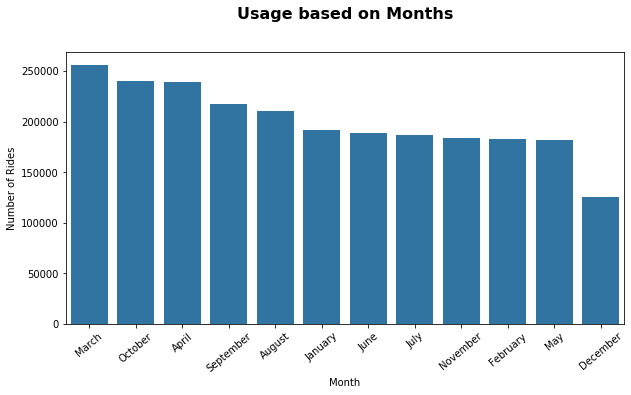

In [19]:
# usage on different months of year 2019
base_color = sb.color_palette()[0]
plt.figure(figsize = [10, 5])
months = list(df_new['start_month'].unique())
cat_order1 = df_new['start_month'].value_counts().index
sb.countplot(data = df_new, x = 'start_month', color = base_color, order = cat_order1);
plt.xticks(rotation = 40);
plt.xlabel('Month');
plt.ylabel('Number of Rides');
plt.title('Usage based on Months', y=1.1, fontsize=16, fontweight='semibold');

Overall share system is used most in months of *March, October and April* and least in *December*(maybe due to winter).

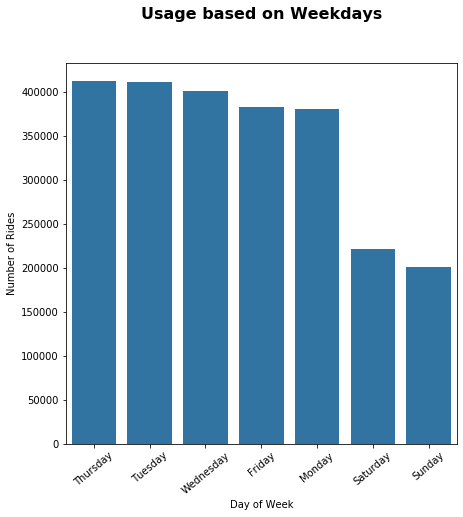

In [20]:
# usage on different weekdays
plt.figure(figsize = [7, 7])

weekdays = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
cat_order2 = df_new['start_weekday'].value_counts().index
sb.countplot(data = df_new, x = 'start_weekday', color = base_color, order = cat_order2);
plt.xticks(rotation = 40);
plt.xlabel('Day of Week');
plt.ylabel('Number of Rides');
plt.title('Usage based on Weekdays', y = 1.1, fontsize = 16, fontweight = 'semibold');

Overall share system is used most in on weekdays and with a significant drop on weekends. We can infer that rides are used mostly for office commute.

In [21]:
# to check for most common values for ride duration, so that outliers are not plotted
df_new['duration_min'].describe(percentiles = [0.99])

count    2.407259e+06
mean     1.292218e+01
std      3.184651e+01
min      1.000000e+00
50%      9.000000e+00
99%      6.800000e+01
max      1.437000e+03
Name: duration_min, dtype: float64

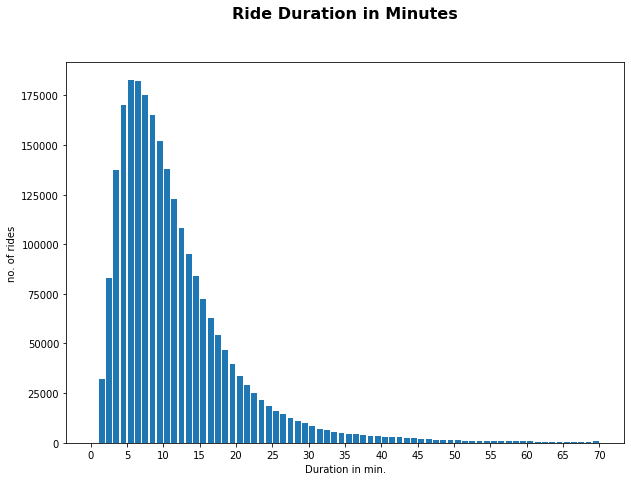

In [22]:
plt.figure(figsize = [10, 7])

bins1 = np.arange(0, 70+1, 1)
ticks = [t for t in range(0, 70+1, 5)]
labels = [val for val in ticks]

plt.hist(data = df_new, x = 'duration_min', bins = bins1, rwidth = 0.8);

plt.title('Ride Duration in Minutes', y = 1.1, fontsize=16, fontweight = 'semibold')
plt.xlabel('Duration in min.')
plt.xticks(ticks, labels);
plt.ylabel('no. of rides');


Ride durations are on average usually 4 to 15 minutes long. Also, rides are mostly don't last more than 40 minutes, but there are few exceptions.

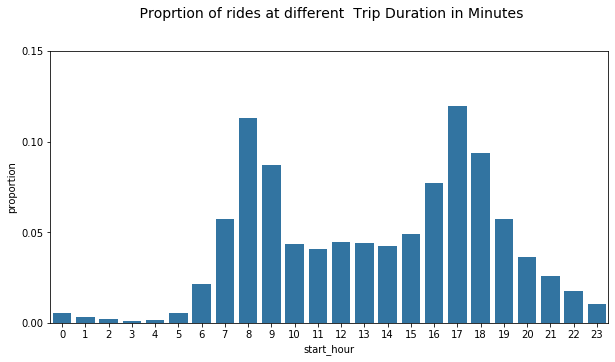

In [23]:
# show bar charts in terms of proportions
plt.figure(figsize = [10, 5])
# get proportion taken by most common group for derivation of tick marks
n_points = df_new.shape[0]
max_count = df_new['start_hour'].value_counts().max()
max_prop = max_count / n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop + 0.05, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# 3. create the plot
sb.countplot(data = df_new, x = 'start_hour', color = base_color)
plt.yticks(tick_props * n_points, tick_names);
plt.ylabel('hour');
plt.ylabel('proportion');
plt.title(" Proprtion of rides at different  Trip Duration in Minutes", y = 1.1, fontsize = 14);

The system is used more often between **7AM** and **9AM** and between **4PM** and **6PM**. Maybe people use bikes to go and come back from offices and work areas.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> There were no major outliers and other problems in distribution statistics of features due to thorough and mindful cleaning of dataset and transformation done. The only problem I faced was that the largest ride duration was about 1.437e+3 minutes which is roughly eqaul to 24 hours or 1 day. 

> Also the original ride duration were in seconds leading to very large values. I created another column for durations in minutes. Also it is tedious to extract hour, weekday and month information from timestamp for each plot. Hence I created seperate columns for these quantities.  

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The distribution of the ride duration had outliers where largest duration was about 1.437e+3 minutes which is roughly eqaul to 24 hours or 1 day. I observed around 99% of rides were between 1 and 68 minutes. This prompted me to removed ride durations greater than 68 minutes.

<a id='bi'></a>
## 3.2. Bivariate Exploration

--------------------------------------------

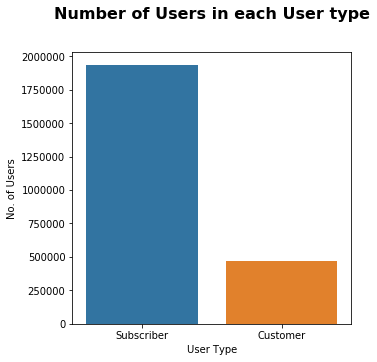

In [24]:
# number of Users in each user type
plt.figure(figsize=[5, 5])
orders = df_new.user_type.value_counts().index
sb.countplot(data = df_new, x='user_type', order=orders);
plt.xlabel('User Type');
plt.ylabel('No. of Users');
plt.title('Number of Users in each User type', fontsize = 16, y = 1.1, fontweight='semibold');

The Bike sharing system is used more often by *subscribers* than *casual customers*.

<Figure size 1440x720 with 0 Axes>

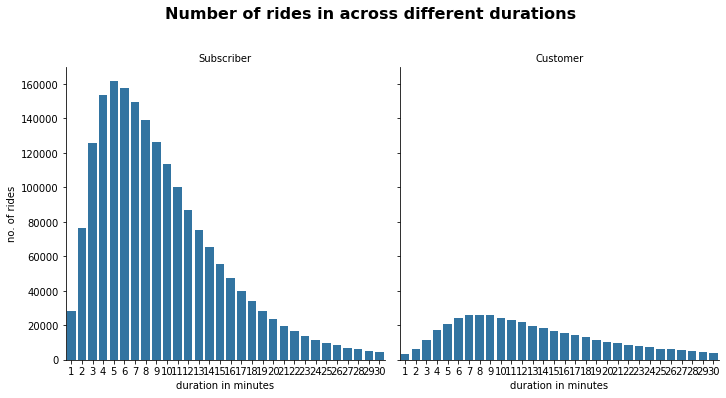

In [25]:
# Number of rides in across different durations
plt.figure(figsize = [20, 10])

data = df_new.query('duration_min < 31')

g = sb.catplot(data = data, x = 'duration_min', col = 'user_type', kind = 'count', color = base_color);

g.set_titles(col_template = '{col_name}');
g.set_axis_labels('duration in minutes', 'no. of rides');
g.fig.suptitle('Number of rides in across different durations', fontsize = 16, y = 1.1, fontweight='semibold');


The bike sharing service is used more by subscribers but the ride durations on average are a bit longer for casual customers (4 to 15 minutes) than for subscribers (3 to 10 minutes).

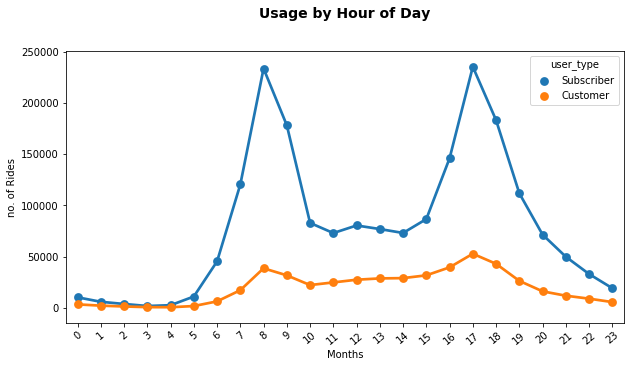

In [26]:
# usage by hour
plt.figure(figsize = [10, 5])

ct_count = df_new.groupby(['start_hour', 'user_type']).size()
ct_count = ct_count.reset_index()
sb.pointplot(data=ct_count, x = 'start_hour',  hue = 'user_type', y = 0);
plt.xticks(rotation = 40)
plt.xlabel('Months')
plt.ylabel('no. of Rides');
plt.title('Usage by Hour of Day', y = 1.1, fontsize = 14, fontweight = 'semibold');

For **Subscribers**, large number of bike sharing happens between **7AM** and **9AM** and between **4PM** and **7PM**. 

For ***casual customers***, large number of bike sharing happens between **8AM** and **6PM**.

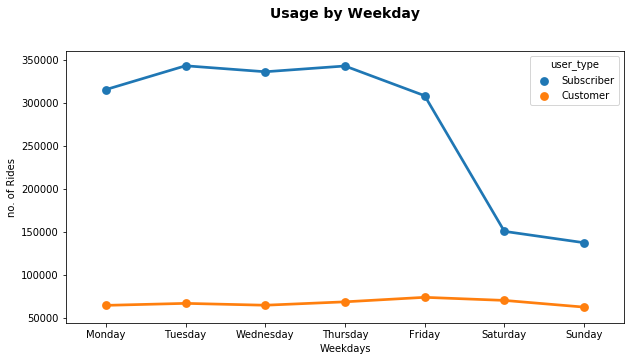

In [27]:
# usage by weekdays

plt.figure(figsize = [10, 5])

ct_count = df_new.groupby(['start_weekday', 'user_type']).size()
ct_count = ct_count.reset_index()
sb.pointplot(data=ct_count, x = 'start_weekday',  hue = 'user_type', y = 0);
plt.xlabel('Weekdays')
plt.ylabel('no. of Rides');
plt.title('Usage by Weekday', y = 1.1, fontsize = 14, fontweight = 'semibold');

The bike sharing system was used more often by subscribers on weekdays with a significant drop on weekends. No such trend was observed for casual customers where number of rides remains relatively constant. We can infer that bike sharing is used more often by subscribers for daily commute to offices and workspaces. 

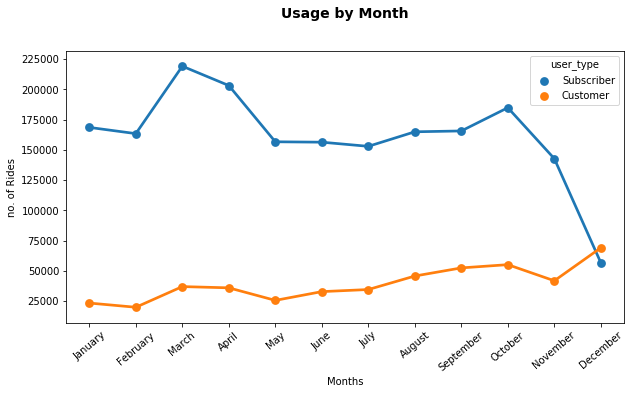

In [28]:
# usage by month
plt.figure(figsize = [10, 5])

ct_count = df_new.groupby(['start_month', 'user_type']).size()
ct_count = ct_count.reset_index()
# weekdays = list(df_new['start_time_month'].unique())
sb.pointplot(data=ct_count, x = 'start_month',  hue = 'user_type', y = 0);
plt.xticks(rotation = 40)
plt.xlabel('Months')
plt.ylabel('no. of Rides');
plt.title('Usage by Month', y = 1.1, fontsize = 14, fontweight = 'semibold');

The bike share system was used more often by subscribers in months of March, October and April with a drop in usage from October to January(maybe due to winter). Casual customers use bike sharing more in months of December and October.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> In these analysis we included the **user_type** feature. 
- We observed that bike sharing usage patterns were different for subscribers and casual users. For Subscribers, large number of bike sharing happens between 7AM and 9AM and between 4PM and 7PM. For casual customers, large number of bike sharing happens between 8AM and 6PM. 
- The bike sharing system was used more often by subscribers on weekdays with a significant drop on weekends. No such trend was observed for casual customers where number of rides remains relatively constant. We can infer that bike sharing is used by subscribers for daily commute to offices and workspaces. 


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?


> - The bike sharing service is used more by subscribers but the ride durations on average are a bit longer for casual customers (4 to 15 minutes) than for subscribers (3 to 10 minutes).
- The bike share system was used more often by subscribers in months of March, October and April with a drop in usage from October to January(maybe due to winter). Casual customers use bike sharing more in months of December and October.

<a id='multi'></a>
## 3.3. Multivariate Exploration
------------------------------


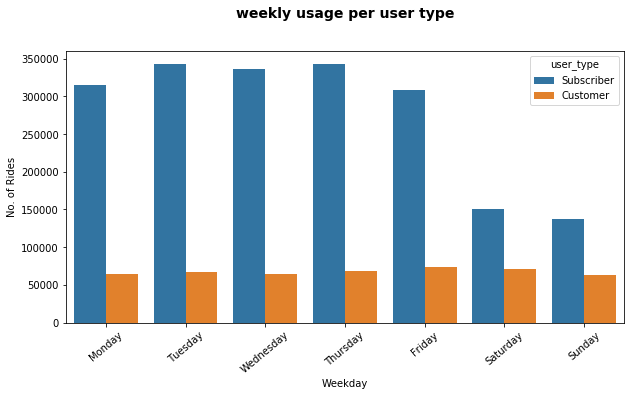

In [29]:
# weekly usage per user type
plt.figure(figsize = [10, 5])
g = sb.countplot(data=df_new, x='start_weekday', hue="user_type") 
plt.xticks(rotation = 40);
plt.xlabel('Weekday');
plt.ylabel('No. of Rides')
plt.title("weekly usage per user type", y = 1.1, fontsize = 14, fontweight = 'semibold');

The bike sharing system was used more often by subscribers on weekdays with a significant drop on weekends. No such trend was observed for casual customers where number of rides remains relatively constant. We can infer that bike sharing is used more often by subscribers for daily commute to offices and workspaces.

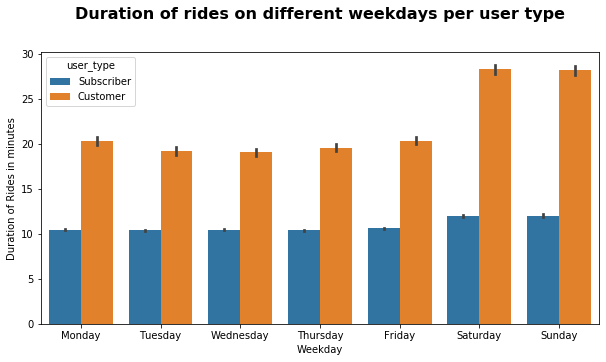

In [40]:
# Duration of bike rides on different weekdays usage for different user types
plt.figure(figsize = [10, 5])

ax = sb.barplot(data = df_new, x = "start_weekday", y = "duration_min", hue = "user_type");
plt.xlabel('Weekday');
plt.ylabel('Duration of Rides in minutes')
plt.title("Duration of rides on different weekdays per user type", y = 1.1, fontsize = 16, fontweight = 'semibold');

It can be seen that casual customers use bike sharing for longer durations (18-20 minutes during weekdays and 27-30 minutes during weekends) than subscribers(who ride for around 10 minutes on weekdays and 12 minutes on weekends). This difference is significant during weekends. 

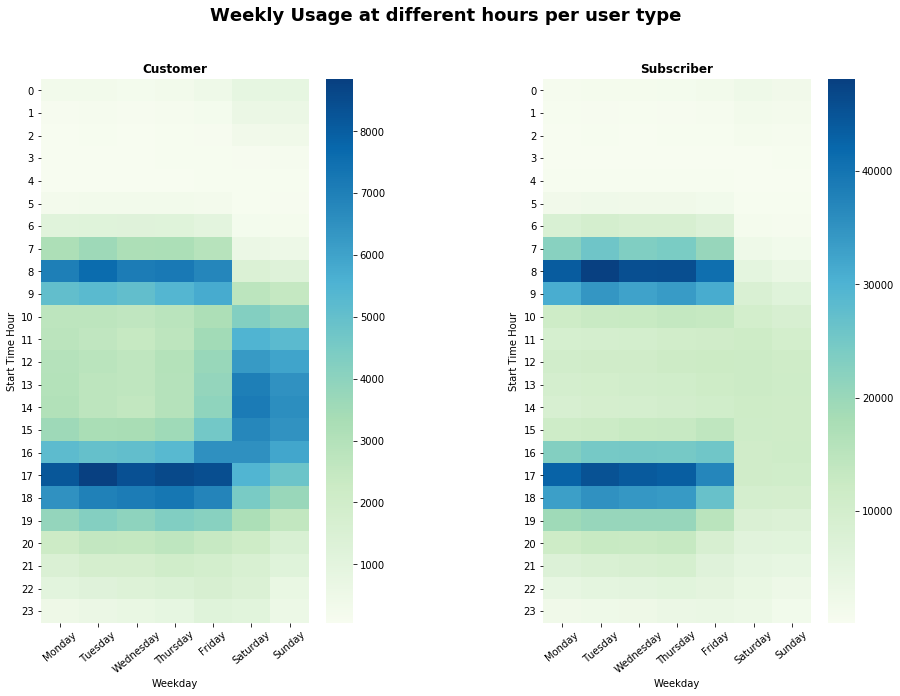

In [37]:
plt.figure(figsize = [15,10])

plt.suptitle('Weekly Usage at different hours per user type', fontweight = 'semibold', fontsize = 18);

# plot heatmap for customer
plt.subplot(1, 2, 1)
ct_count1 = df_new.query("user_type == 'Customer'").groupby(['start_hour', 'start_weekday'])['bike_id'].size() 
ct_count1 = ct_count1.reset_index()
ct_count1 = ct_count1.pivot(index = "start_hour", columns = "start_weekday", values = "bike_id")
sb.heatmap(ct_count1, cmap='GnBu')
plt.xlabel('Weekday');
plt.ylabel('Start Time Hour');
plt.xticks(rotation = 40)
plt.yticks(rotation = 0)
plt.title("Customer", fontweight = 'semibold');

# plot heatmap for subscriber
plt.subplot(1, 2, 2)
ct_count2 = df_new.query("user_type == 'Subscriber'").groupby(['start_hour', 'start_weekday'])['bike_id'].size()
ct_count2 = ct_count2.reset_index()
ct_count2 = ct_count2.pivot(index = 'start_hour', columns = 'start_weekday', values = 'bike_id')
sb.heatmap(ct_count2, cmap='GnBu')
plt.xlabel('Weekday');
plt.ylabel('Start Time Hour');
plt.xticks(rotation = 40)
plt.yticks(rotation = 0)
plt.title('Subscriber', fontweight = 'semibold');

plt.subplots_adjust(wspace = 0.5)


This plot summarizes many things at once.

First we can see that ***subscribers*** use the bike sharing system mainly on *weekdays*. Large number of bike sharing happens between **7AM** and **9AM** and between **4PM** and **7PM**. Number of bike sharing is at peak on **Tuesday at 8AM** where more than 45,000 subscribers using it. There is significant drop on weekends with number of rides between 10,000 and 15,000 .

Second,  we can see that ***casual customers*** use the bike sharing system on *weekdays* as well as on *weekends*. But the timings differ between weekdays and weekends. During weekdays, large number of bike sharing happens between **7AM** and **9AM** and between **4PM** and **7PM**. Number of bike sharing is at peak on **Tuesday at 8AM and 5PM** where more than 7,000 customers using it. During weekends number of bike rides is at more between **10AM** and **6PM**.

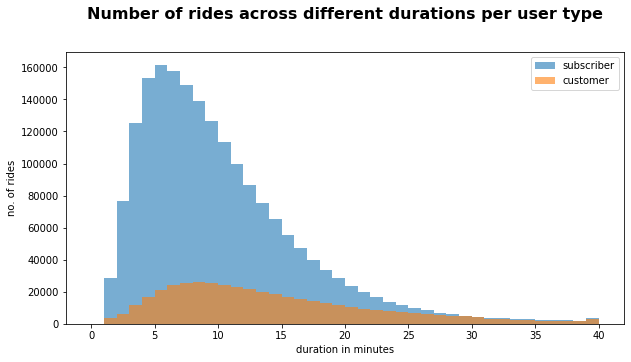

In [41]:
# number of rides across different durations per user type
plt.figure(figsize = [10, 5])

df_cust = df_new.query("user_type == 'Customer'")
df_cust = df_cust.query("duration_min < 41")

df_subs = df_new.query("user_type == 'Subscriber'")
df_subs = df_subs.query("duration_min < 41")

bins = np.arange(0, 41, 1)
plt.hist(data = df_subs, x = 'duration_min', bins = bins, alpha = 0.6, label = 'subscriber');
plt.hist(data = df_cust, x = 'duration_min', bins = bins, alpha = 0.6, label = 'customer');
plt.xlabel('duration in minutes');
plt.ylabel('no. of rides');
plt.title('Number of rides across different durations per user type', y = 1.1, fontweight = 'semibold', fontsize = 16);
plt.legend(loc = 'upper right');

The bike sharing service is **used more by subscribers** but the *ride durations* on average are a bit **longer for casual customers** (4 to 20 minutes) than for subscribers (3 to 12 minutes).

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?


> - Subscribers use bike sharing mainly on weekdays and there is significant drop in number of rides on weekends. We can also see that casual customers use the bike sharing system on *weekdays* as well as on *weekends* alike.
- The service is used more by Subscribers with high numbers between 7AM and 9AM and between 4PM and 7PM on weekdays. 
- The service is used less frequently by casual customers with high numbers between 7AM and 9AM on weekdays and between  10AM and 6PM on weekends.


### Were there any interesting or surprising interactions between features?

> Even though subscribers use bike sharing **more often**, they use it for **shorter** durations(3 to 12 minutes). Whereas, **customers** use the sharing service for **longer** durations(4 to 20 minutes). 

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!